In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, f1_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

import mlflow

In [2]:
# First we load the preprocessed data
df = pd.read_csv('../data/preprocessing/clean_data_card_transdata.csv')
print("The data has been uploaded successfully!")


The data has been uploaded successfully!


In [ ]:
# Split the data: features and target
X = df.drop(columns=['fraud', 'ratio_to_median_purchase_price'])
y = df[['fraud']]


In [ ]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

800000 800000
200000 200000


# Baseline Model

In [34]:
df = pd.read_csv('../data/preprocessing/clean_data_card_transdata.csv')

X = df.drop(columns=['fraud', 'ratio_to_median_purchase_price'])
y = df[['fraud']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)



c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


============= Random Forest  FINAL MODEL ==================
f1_score:  0.39955308873351114
recall:  0.3177779051768618
precision_score:  0.5379986411724741
[[177797   4760]
 [ 11900   5543]]


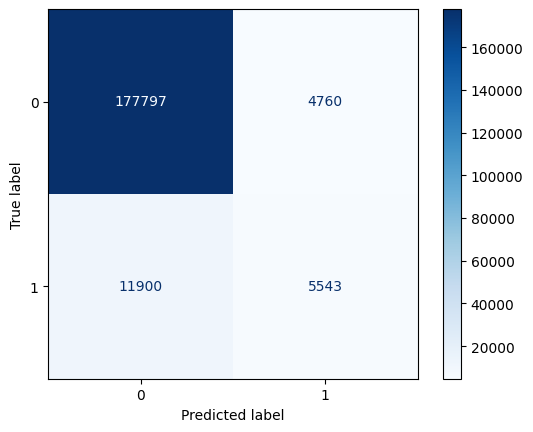

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators= 200,
    criterion= 'gini',
    random_state= 42
)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

f1_score_rf = f1_score(y_test, y_pred_rf)
recall_score_rf = recall_score(y_test, y_pred_rf)
precision_score_rf = precision_score(y_test, y_pred_rf)

print("============= Random Forest BaseLine Model ==================")
print("f1_score: ", f1_score_rf)
print("recall: ", recall_score_rf)
print("precision_score: ", precision_score_rf)


conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_mat_rf)
cmf = ConfusionMatrixDisplay(conf_mat_rf)
cmf.plot(include_values= True, cmap= 'Blues')
plt.show()

# MLFlow

In [41]:
mlflow.set_experiment("Credit Card Fraud Detection")
print("The experiment has been set successfully!")

Traceback (most recent call last):
  File "c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\store\tracking\file_store.py", line 368, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
  File "c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\store\tracking\file_store.py", line 466, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
  File "c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\store\tracking\file_store.py", line 1636, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
  File "c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\store\tracking\file_store.py", line 1629, in _read_helper
    result = read_yaml(root, file_name)
  File "c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\utils\yaml_utils.py", line 107, in read_yaml
    raise MissingCon

The experiment has been set successfully!


In [42]:
with mlflow.start_run(run_name="RandomForestBaseLineModel"):
    # Log Baseline Model: RandomForest
    mlflow.log_metrics({
        "f1_score": f1_score_rf,
        "recall": recall_score_rf,
        "precision": precision_score_rf
    })
    mlflow.log_params({
        'n_estimators': 200,
        'criterion': 'gini',
        'random_state': 42
    })
    mlflow.sklearn.log_model(rf_model, "model")

2025/12/17 20:36:50 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/17 20:37:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


# Amelioration du modele

Revenir au RF simple

Utiliser les probabilités

Optimiser le seuil selon le coût

Comparer avec XGBoost